In [71]:
import sys
!{sys.executable} -m pip install googletrans

     |████████████████████████████████| 55 kB 389 kB/s eta 0:00:01
     |████████████████████████████████| 981 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 617 kB/s eta 0:00:011
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15734 sha256=a7a015f771efdbc3f1afc8da76efeb3135f35c87b7bdf505517634fbc22ae61e
  Stored in directory: /Users/shaan/Library/Caches/pip/wheels/0e/ce/9b/d51de1064911d42480ab6b57fc943ee36572441f27546354e2
Successfully built googletrans


In [72]:
#twitter sentiment analysis prototype 1

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [73]:
from googletrans import Translator

In [12]:
#twitter api

consumer_key = "zXdaZx7xPamImtMBTDeRB9mKk"
consumer_key_secret = "jC1o9CgClgHMCXNM2CfqMe35iACQnvFGnMhU2ImVarkjsNgNl3"

access_token = "1152174540509724672-DDdtLWhCml9YMrnNCzxYJgiWZnqfnt"
access_token_secret = "A0PrASdhnX9SRjm6TC8goWFNEqZqiAj00nYg5w0Wkgkae"

auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [53]:
public_tweets = api.search('Jokowi',count=1000,tweet_mode="extended",include_entities=False)


In [54]:
#5 latest tweets
print("Show the 5 recent tweets: \n")
i = 1
for tweet in public_tweets[0:5]:
    print(str(i) + ')' + tweet.full_text + '\n')
    i = i + 1


Show the 5 recent tweets: 

1)RT @UHyukkie: Leeteuk saying he wanted to meet Presiden Jokowi because it’s been a while since they last met as if they are friends. Super…

2)Komisi III DPR Masih Menunggu Nama Calon Kapolri Dari Presiden Jokowi https://t.co/NhLYyxNd2g

3)RT @masdonge: Idol lain: "saya kangen sama fans indonesia"
Leeteuk Suju: "saya kangen sama pak jokowi" :)))))

4)RT @PutraWadapi: Jika presiden mengatakan tdk  perlu tim independen dibentuk, berarti sama artinya Presiden tdk ingin kasus penembakan angg…

5)RT @democrazymedia: Tolak Tim Independen, Pengamat: Diduga Jokowi Ketakutan Terseret Kasus Terbunuhnya 6 Laskar FPI
https://t.co/ZD22YOFfuf



TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'tweepy.models.Status'>

In [55]:
#create a data frame 
df = pd.DataFrame([tweet.full_text for tweet in public_tweets], columns=['Tweets'])
df.head()
                   
 

,Tweets
0,RT @UHyukkie: Leeteuk saying he wanted to meet...
1,Komisi III DPR Masih Menunggu Nama Calon Kapol...
2,"RT @masdonge: Idol lain: ""saya kangen sama fan..."
3,RT @PutraWadapi: Jika presiden mengatakan tdk ...
4,"RT @democrazymedia: Tolak Tim Independen, Peng..."


In [60]:
#Applying Regex to clean up tweets. Depending on performace, i may decide to exclude some or all regex
def cleanTxt(text):
    text = re.sub('@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text) # hashtag symbol
    text = re.sub(r':', '', text) #remove colon
    text = re.sub(r'"', '', text) #remove quotation marks
    text = re.sub(r'RT[\s]+', '', text) # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) #Removing hyperlink 
    
    return text

#Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)
    


In [61]:
df.head()

,Tweets
0,Leeteuk saying he wanted to meet Presiden Jok...
1,Komisi III DPR Masih Menunggu Nama Calon Kapol...
2,Idol lain saya kangen sama fans indonesia\nLe...
3,Jika presiden mengatakan tdk perlu tim indep...
4,"Tolak Tim Independen, Pengamat Diduga Jokowi ..."


In [91]:
#function that translate tweets from Indonesian to English

# translator = Translator(service_urls=['translate.googleapis.com'])
# df['Translated_Tweets'] = df['Tweets'].apply(translator.translate,src='id', dest='en').apply(getattr, args=('text',))
# df.head()

In [93]:
# import goslate

# gs = goslate.Goslate()
# df['Translated_Tweets'] = df['Tweets'].apply(gs.translate('id')).apply(getattr, args=('text',))
# df.head()


TypeError: translate() missing 1 required positional argument: 'target_language'

In [90]:
#function that returns subjectivitity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#function that returns objectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity
                    
# add 2 columns to data set

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


df


,Tweets,Subjectivity,Polarity
0,Leeteuk saying he wanted to meet Presiden Jok...,0.066667,0.0
1,Komisi III DPR Masih Menunggu Nama Calon Kapol...,0.000000,0.0
2,Idol lain saya kangen sama fans indonesia\nLe...,0.000000,0.0
3,Jika presiden mengatakan tdk perlu tim indep...,0.000000,0.0
4,"Tolak Tim Independen, Pengamat Diduga Jokowi ...",0.000000,0.0
...,...,...,...
95,"SETUJU, saya pikir juga sampai kesitu. bukan p...",0.000000,0.0
96,○\nHAMPapua\nKorbanPHKIlegal\n _RI \n ...,0.000000,0.0
97,Hlahhh.. kata kadroen beliau PKI. Gimana sih ...,0.000000,0.0
98,_11 Pokoknya. Kalo udah berlawanan sama PKS. ...,0.000000,0.0


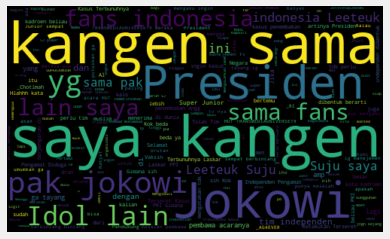

In [96]:
#wordcloyd

allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height=300, random_state=21, max_font_size = 100).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
#must remove stopwords
#must use NN 
#must use tokenization